In [6]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

# Load the Data into a Data Frame

df = pd.read_csv("Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning Process

In [15]:
# Removing Cabin and Embarked columns 
df.drop(['Cabin','Embarked'], axis = 1, inplace = True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708


In [11]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [17]:
# Replacing missing values in the Age Column with the mean Age 

df['Age'].fillna(df['Age'].mean(), inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708


#  Data Visualisation

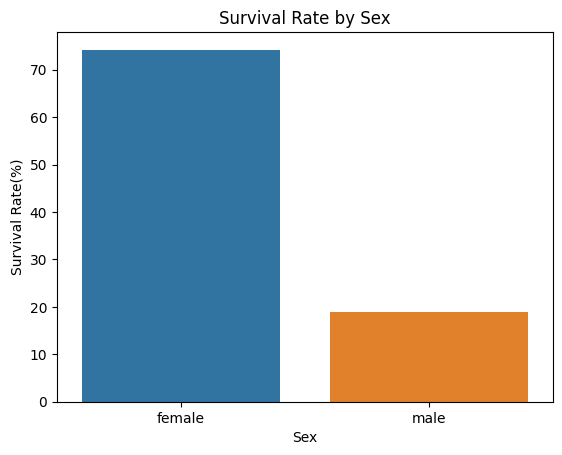

In [22]:
# A Bar Chart to show Survival Rate by Sex

# Calculate the survival rate by sex
survival_rate = df.groupby('Sex')['Survived'].mean()* 100

# Create a bar chart of the survival rate by sex using seaborn
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate(%)')
plt.show()




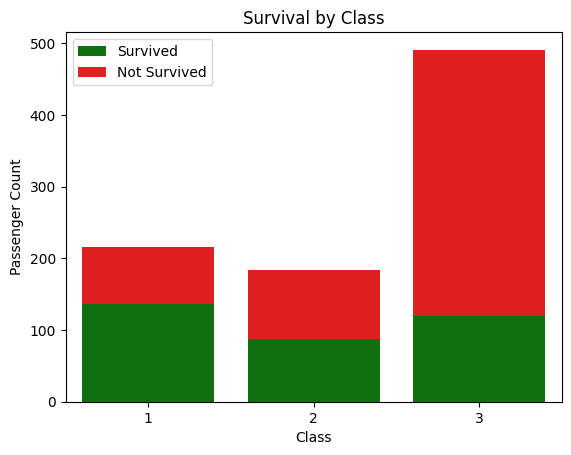

In [23]:
# A stacked Bar graph to show survival by class

# Create a cross-tabulation of survival by class
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'])

# Create a stacked bar graph of the survival by class using seaborn
sns.barplot(x=survival_by_class.index, y=survival_by_class[1], color='g', label='Survived')
sns.barplot(x=survival_by_class.index, y=survival_by_class[0], color='r', bottom=survival_by_class[1], label='Not Survived')
plt.title('Survival by Class')
plt.xlabel('Class')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

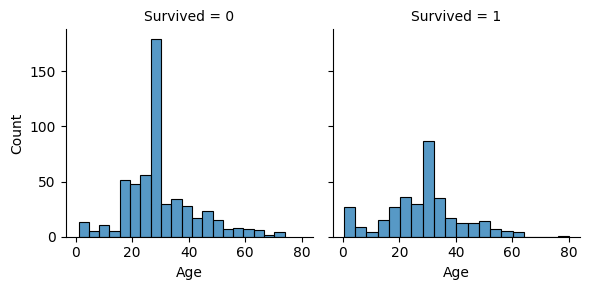

In [24]:
# A histogram for Age distribution by survival 

g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Age', bins=20)

<Axes: xlabel='Survived', ylabel='Fare'>

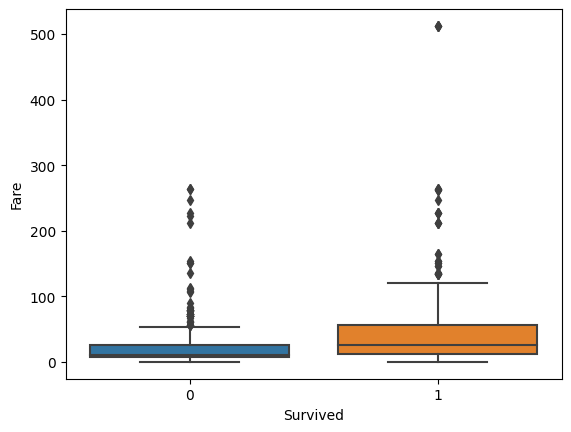

In [26]:
# Create a box plot of fare by survival
sns.boxplot(x='Survived', y='Fare', data=df)

# Findings